In [6]:
#
from sparse_tools import *
from survey_params import *

datadir = '/Volumes/Drive/sim_cii/data_sparse/gen/'
survey_param = survey1_param()
dth = survey_param.dth
nu_binedges = survey_param.nu_binedges
nu_bins = survey_param.nu_bins
line_use = [0,2,3,4,5,6]
line_name_arr = ['CII', 'CO(2-1)', 'CO(3-2)', 'CO(4-3)', 'CO(5-4)', 'CO(6-5)']
nu0_arr = [spec_lines.CII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(2).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(3).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(4).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(5).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(6).to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use

In [7]:
with open('data_internal/sparse_S1_dict.pickle','rb') as pfile:
    A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all = pickle.load(pfile)

### lightcone params

In [8]:
Neff_arr = [1]
sigI_arr = [1e3, 5e3, 1e4, 5e4]
sig_th_arr = [1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10]
N_lc = 2500
N_sim = 100

param_dict = {}
param_dict['Neff'] = Neff_arr
param_dict['sigI'] = sigI_arr
param_dict['sig_th'] = sig_th_arr
with open(datadir + 'S1_param_dict.pickle','wb') as pfile:
    pickle.dump(param_dict, pfile)

### Generate ligh cones

skip this cell

=================

In [4]:
# iNeff = 0
# Neff_scale = Neff_arr[0]
# N_true, Itrue_all, Itrue_targ \
#    = gen_lightcone(N_lc, dth, nu_binedges, sp2, z_coords_all, I_coords_all,
#                        z_idx, line_use, line_targ_vec, Neff_scale = Neff_scale)
# np.save(datadir + 'N_true%d'%iNeff, N_true)
# np.save(datadir + 'Itrue_all%d'%iNeff, Itrue_all)
# np.save(datadir + 'Itrue_targ%d'%iNeff, Itrue_targ)

=================

In [4]:
iNeff = 0
N_true = np.load(datadir + 'N_true%d.npy'%iNeff)
Itrue_all = np.load(datadir + 'Itrue_all%d.npy'%iNeff)
Itrue_targ = np.load(datadir + 'Itrue_targ%d.npy'%iNeff)

491.04645699463845 18345.199199328228
491.04645699463845 15704.786250958898
491.04645699463845 14238.804588925377
491.04645699463845 13153.840568386173
491.04645699463845 11489.239782919232
491.04645699463845 11270.889875872257


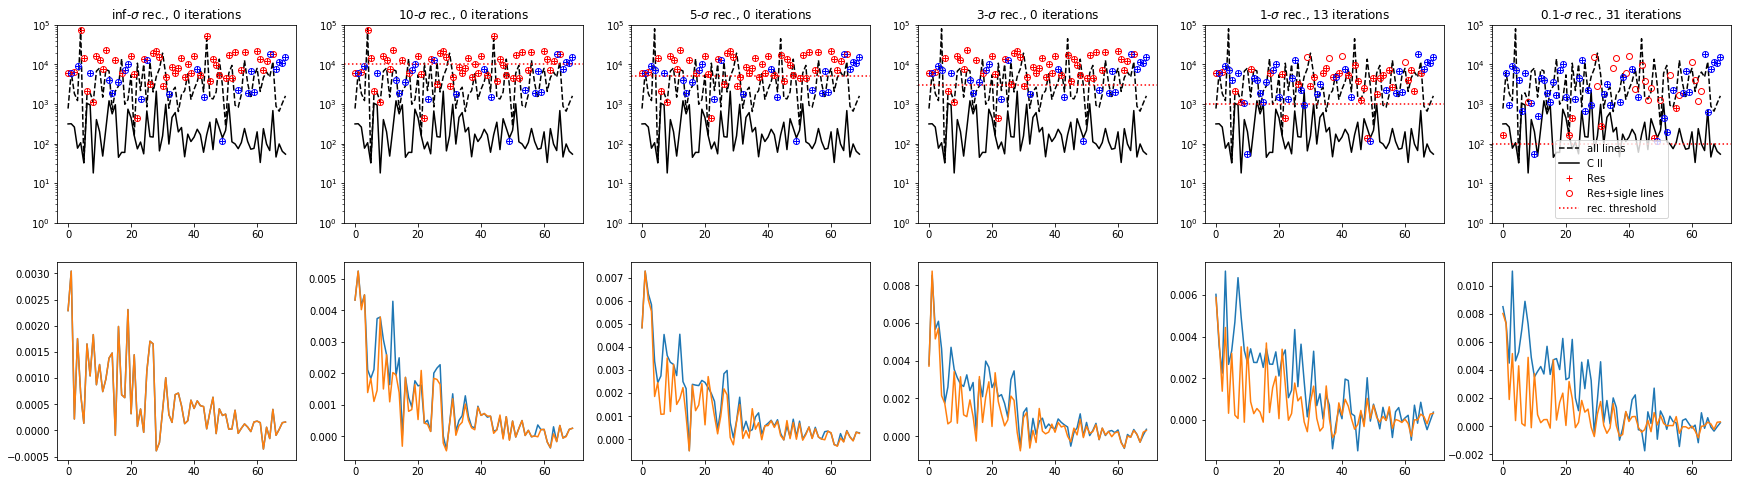

In [101]:
sigI = sigI_arr[2]
fig, ax = plt.subplots(2,6,figsize=(30,8))
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
for i,sig_th in enumerate([np.inf,10,5,3,1,0.1]):
    N_pred,iter_count,R_arr,f_arr = run_MP_sig(A, I_norm, Iobs_all, sigI,sig_th,
                                               return_iter = True, return_Rf=True)
    Ipred_all, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
                          nu_binedges, line_use, line_targ_vec, verbose = 0)
    R1_arr = R_arr + f_arr - Ipred_all
    
    cr_arr = np.zeros(N_nu)
    cr_arr1 = np.zeros(N_nu)
    for j in range(N_nu):
        mapt = Itrue_targ[0, :, j]
        mapt = mapt - np.mean(mapt)
        mapr = R_arr[:,j]
        mapr = mapr - np.mean(mapr)
        mapr1 = R1_arr[:,j]
        mapr1 = mapr1 - np.mean(mapr1)        
        cr_arr[j] = np.sum(mapt * mapr) / \
            np.sqrt(np.sum(mapr**2) * np.sum(mapr**2))
        cr_arr1[j] = np.sum(mapt * mapr1) / \
            np.sqrt(np.sum(mapr1**2) * np.sum(mapr1**2))
    
    sigcii = np.std(Itrue_targ[0,:,:])
    sigR = np.std(R1_arr)
    print(sigcii,sigR)
    
    ax[0][i].plot(Itrue_all[0,:],'k--', label='all lines')
    ax[0][i].plot(Itrue_targ[0,0,:],'k', label='C II')    
    ax[0][i].plot(R_arr[0,:],'r+',label='Res')
    ax[0][i].plot(-R_arr[0,:],'b+')
    ax[0][i].plot(R1_arr[0],'ro',mfc = 'none',label='Res+sigle lines')
    ax[0][i].plot(-R1_arr[0],'bo',mfc = 'none')
    ax[0][i].axhline(sig_th*1e3,c='r', ls=':',label='rec. threshold')
    ax[0][i].set_yscale('log')
    ax[0][i].set_title('%.0f-$\sigma$ rec., %d iterations'%(sig_th,iter_count))
    if sig_th < 1:
        ax[0][i].set_title('%.1f-$\sigma$ rec., %d iterations'%(sig_th,iter_count))
    ax[0][i].set_ylim([1e0,1e5])
    
    ax[1][i].plot(cr_arr)
    ax[1][i].plot(cr_arr1)
ax[0][i].legend(loc=0)

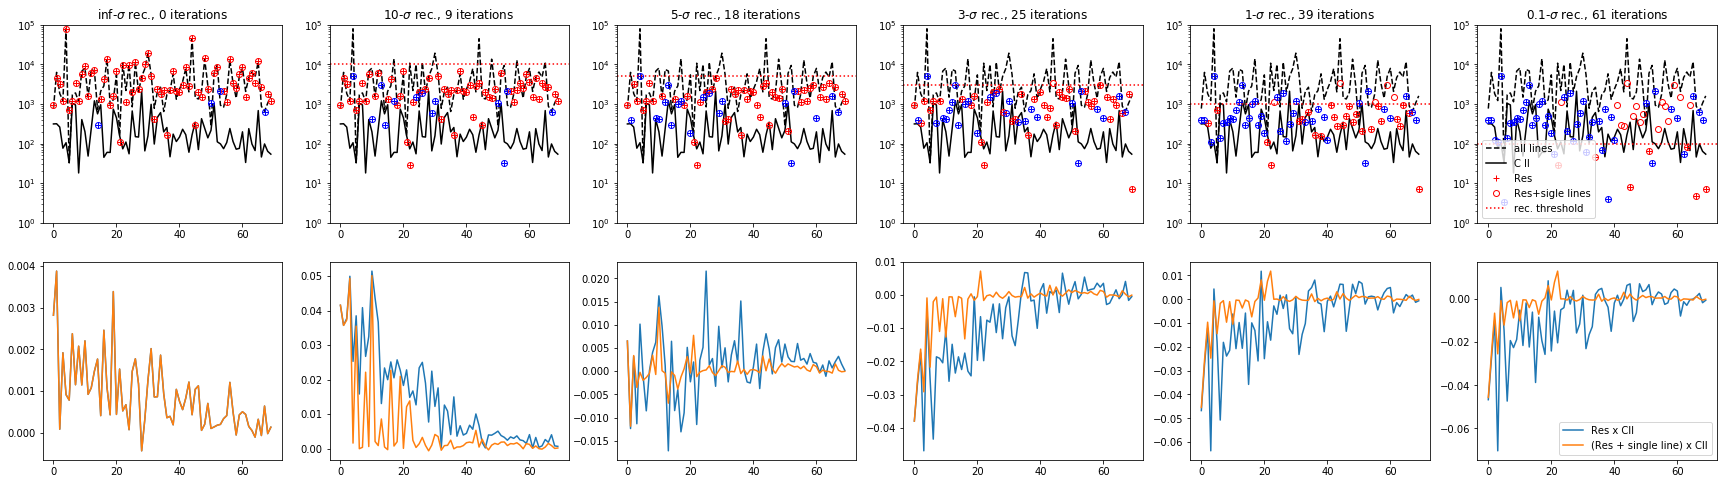

In [85]:
sigI = sigI_arr[0]
fig, ax = plt.subplots(2,6,figsize=(30,8))
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
for i,sig_th in enumerate([np.inf,10,5,3,1,0.1]):
    N_pred,iter_count,R_arr,f_arr = run_MP_sig(A, I_norm, Iobs_all, sigI,sig_th,
                                               return_iter = True, return_Rf=True)
    Ipred_all, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
                          nu_binedges, line_use, line_targ_vec, verbose = 0)
    R1_arr = R_arr + f_arr - Ipred_all
    
    cr_arr = np.zeros(N_nu)
    cr_arr1 = np.zeros(N_nu)
    for j in range(N_nu):
        mapt = Itrue_targ[0, :, j]
        mapt = mapt - np.mean(mapt)
        mapr = R_arr[:,j]
        mapr = mapr - np.mean(mapr)
        mapr1 = R1_arr[:,j]
        mapr1 = mapr1 - np.mean(mapr1)        
        cr_arr[j] = np.sum(mapt * mapr) / \
            np.sqrt(np.sum(mapr**2) * np.sum(mapr**2))
        cr_arr1[j] = np.sum(mapt * mapr1) / \
            np.sqrt(np.sum(mapr1**2) * np.sum(mapr1**2))

    ax[0][i].plot(Itrue_all[0,:],'k--', label='all lines')
    ax[0][i].plot(Itrue_targ[0,0,:],'k', label='C II')    
    ax[0][i].plot(R_arr[0,:],'r+',label='Res')
    ax[0][i].plot(-R_arr[0,:],'b+')
    ax[0][i].plot(R1_arr[0],'ro',mfc = 'none',label='Res+sigle lines')
    ax[0][i].plot(-R1_arr[0],'bo',mfc = 'none')
    ax[0][i].axhline(sig_th*1e3,c='r', ls=':',label='rec. threshold')
    ax[0][i].set_yscale('log')
    ax[0][i].set_title('%.0f-$\sigma$ rec., %d iterations'%(sig_th,iter_count))
    if sig_th < 1:
        ax[0][i].set_title('%.1f-$\sigma$ rec., %d iterations'%(sig_th,iter_count))
    ax[0][i].set_ylim([1e0,1e5])
    
    ax[1][i].plot(cr_arr,label = 'Res x CII')
    ax[1][i].plot(cr_arr1, label ='(Res + single line) x CII')

ax[0][i].legend(loc=0)
ax[1][i].legend(loc=0)

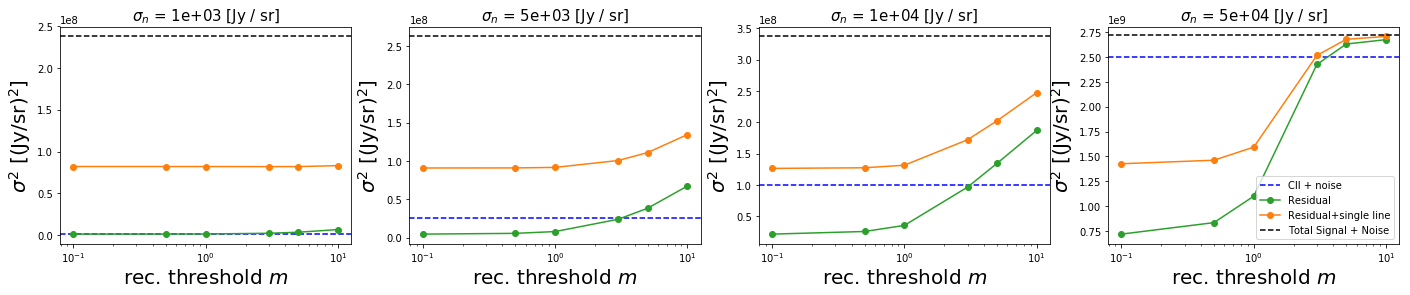

In [147]:
fig, ax = plt.subplots(1,4,figsize=(24,4))
sig_th_arr = [0.1,0.5,1,3,5,10]
for i,sigI in enumerate(sigI_arr):
    varcii = np.var(Itrue_targ[0,:,:])
    varn = sigI**2
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    varRinf = np.var(Iobs_all)
    varR_arr = np.zeros(len(sig_th_arr))
    varR1_arr = np.zeros(len(sig_th_arr))
    for j,sig_th in enumerate(sig_th_arr):
        N_pred,iter_count,R_arr,f_arr = run_MP_sig(A, I_norm, Iobs_all, sigI,sig_th,
                                                   return_iter = True, return_Rf=True)
        Ipred_all, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
                              nu_binedges, line_use, line_targ_vec, verbose = 0)
        R1_arr = R_arr + f_arr - Ipred_all

        varR_arr[j] = np.var(R_arr)
        varR1_arr[j] = np.var(R1_arr)
    
    ax[i].axhline(varn+varcii, ls='--', c='b', label = 'CII + noise')
    ax[i].plot(sig_th_arr,varR_arr, 'C2o-', label = 'Residual')
    ax[i].plot(sig_th_arr,varR1_arr, 'C1o-', label = 'Residual+single line')
    ax[i].axhline(varRinf, c= 'k', ls='--', label = 'Total Signal + Noise')
    ax[i].set_ylabel('$\sigma^2$ [(Jy/sr)$^2$]', fontsize = 20)
    ax[i].set_xlabel(r'rec. threshold $m$', fontsize = 20)
    ax[i].set_title(r'$\sigma_n$ = ' + '%.0e [Jy / sr]'%sigI, fontsize = 15)
    ax[i].set_xscale('log')
ax[i].legend(loc=0, fontsize = 10)
plt.savefig('plots/paperfig/var_res.pdf', bbox_inches = 'tight', dpi = 200)

sigI=1.0e+03, sig_th = 0.1
sigI=1.0e+03, sig_th = 0.5
sigI=1.0e+03, sig_th = 1.0
sigI=1.0e+03, sig_th = 3.0
sigI=1.0e+03, sig_th = 5.0
sigI=1.0e+03, sig_th = 10.0
sigI=5.0e+03, sig_th = 0.1
sigI=5.0e+03, sig_th = 0.5
sigI=5.0e+03, sig_th = 1.0
sigI=5.0e+03, sig_th = 3.0
sigI=5.0e+03, sig_th = 5.0
sigI=5.0e+03, sig_th = 10.0
sigI=1.0e+04, sig_th = 0.1
sigI=1.0e+04, sig_th = 0.5
sigI=1.0e+04, sig_th = 1.0
sigI=1.0e+04, sig_th = 3.0
sigI=1.0e+04, sig_th = 5.0
sigI=1.0e+04, sig_th = 10.0
sigI=5.0e+04, sig_th = 0.1
sigI=5.0e+04, sig_th = 0.5
sigI=5.0e+04, sig_th = 1.0
sigI=5.0e+04, sig_th = 3.0
sigI=5.0e+04, sig_th = 5.0
sigI=5.0e+04, sig_th = 10.0


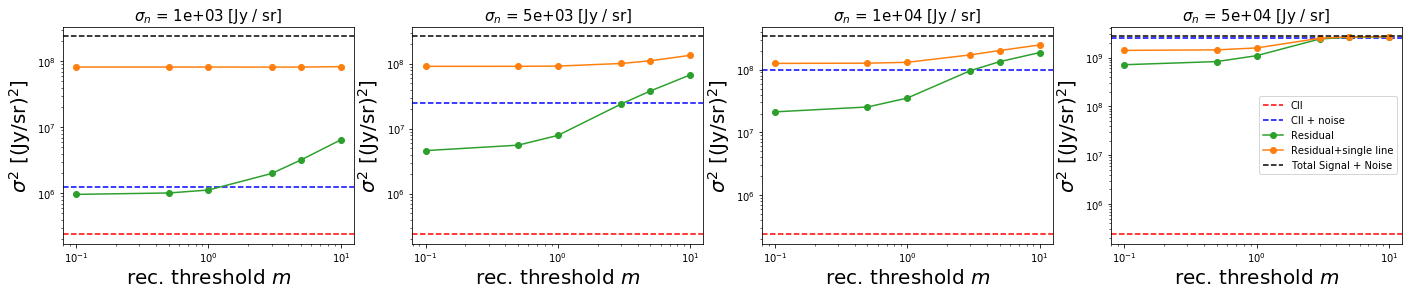

In [150]:
fig, ax = plt.subplots(1,4,figsize=(24,4))
sig_th_arr = [0.1,0.5,1,3,5,10]
for i,sigI in enumerate(sigI_arr):
    varcii = np.var(Itrue_targ[0,:,:])
    varn = sigI**2
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    varRinf = np.var(Iobs_all)
    varR_arr = np.zeros(len(sig_th_arr))
    varR1_arr = np.zeros(len(sig_th_arr))
    for j,sig_th in enumerate(sig_th_arr):
        print('sigI=%.1e, sig_th = %.1f'%(sigI,sig_th))
        N_pred,iter_count,R_arr,f_arr = run_MP_sig(A, I_norm, Iobs_all, sigI,sig_th,
                                                   return_iter = True, return_Rf=True)
        Ipred_all, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
                              nu_binedges, line_use, line_targ_vec, verbose = 0)
        R1_arr = R_arr + f_arr - Ipred_all

        varR_arr[j] = np.var(R_arr)
        varR1_arr[j] = np.var(R1_arr)
    
    ax[i].axhline(varcii, ls='--', c='r', label = 'CII')
    ax[i].axhline(varn+varcii, ls='--', c='b', label = 'CII + noise')
    ax[i].plot(sig_th_arr,varR_arr, 'C2o-', label = 'Residual')
    ax[i].plot(sig_th_arr,varR1_arr, 'C1o-', label = 'Residual+single line')
    ax[i].axhline(varRinf, c= 'k', ls='--', label = 'Total Signal + Noise')
    ax[i].set_ylabel('$\sigma^2$ [(Jy/sr)$^2$]', fontsize = 20)
    ax[i].set_xlabel(r'rec. threshold $m$', fontsize = 20)
    ax[i].set_title(r'$\sigma_n$ = ' + '%.0e [Jy / sr]'%sigI, fontsize = 15)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
ax[i].legend(loc=0, fontsize = 10)
plt.savefig('plots/paperfig/var_res_log.pdf', bbox_inches = 'tight', dpi = 200)

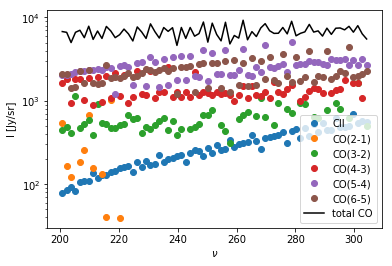

In [174]:
for j,name in enumerate(line_name_arr):
    plt.plot(nu_bins,np.mean(Itrue_targ[j,:,:],axis=0),'o',label=name)
plt.plot(nu_bins,np.mean(np.sum(Itrue_targ[1:,:,:],axis=0),axis=0),'k',label='total CO')
plt.yscale('log')
plt.ylabel('I [Jy/sr]')
plt.xlabel(r'$\nu$')
plt.legend()

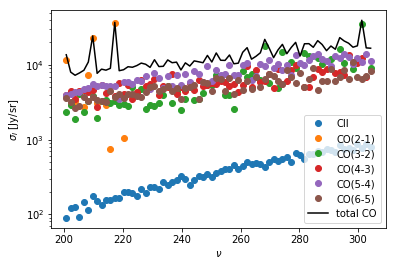

In [177]:
for j,name in enumerate(line_name_arr):
    plt.plot(nu_bins,np.std(Itrue_targ[j,:,:],axis=0),'o',label=name)
plt.plot(nu_bins,np.std(np.sum(Itrue_targ[1:,:,:],axis=0),axis=0),'k',label='total CO')
plt.yscale('log')
plt.ylabel(r'$\sigma_I$ [Jy/sr]')
plt.xlabel(r'$\nu$')
plt.legend()

In [9]:
Neff_scale=1
L_arr1, N_arr1, zbins = sim_Llc_P16(N_lc, dth, jco = 1, Neff_scale = Neff_scale)
L_arr2, N_arr2, zbins = sim_Llc_P16(N_lc, dth, jco = 0, Neff_scale = Neff_scale)
L_arr, N_arr= L_arr1, N_arr1
L_arr[:, zbins > 5] = L_arr2[:, zbins > 5]
N_arr[:, zbins > 5] = N_arr2[:, zbins > 5]
zsrc = [zbins.tolist()]*N_lc

F_arr = np.zeros(N_arr.shape)
for i in range(N_arr.shape[1]):
    _, _ , Ls = LF_P16(zbins[i], 1, [])
    Fs = N_arr[:,i] * Ls / 4 / np.pi / cosmo.luminosity_distance(zbins[i]).value
    F_arr[:,i] = Fs

Itrue_all, Itrue_targ = Ivox_from_zsrc(zsrc, dth, nu_binedges, line_use, line_targ_vec, 
                                       Lratio = N_arr.tolist(), sigL = [], verbose=0)
Nsrc = N_arr.tolist()
Ntrue = zlist_to_N(zsrc, z_coords_all, I_coords_all, z_idx, sp2, Nsrc = Nsrc)
Ntrue = Ntrue[:,sp2]

0.016622857142857144

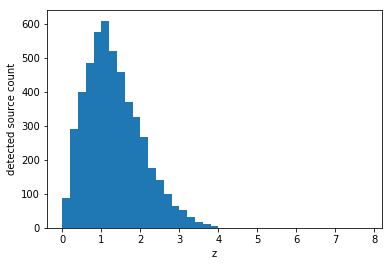

In [10]:
Fline_th = 1
zsrc = []
zsrc1d = []
for ilc in range(N_lc):
    zsrci = []
    sp = np.where(F_arr[ilc,:] > Fline_th)[0]
    zs = zbins[sp]
    zs = zs[zs<4] # only get CO
    zsrci = zsrci + zs.tolist()
    zsrc.append(zsrci)
    zsrc1d = zsrc1d + zsrci
Nall = zlist_to_N(zsrc, z_coords_all, I_coords_all, z_idx, sp2)

plt.figure()
plt.hist(zsrc1d, bins=np.arange(0,8,0.2))
plt.xlabel('z')
plt.ylabel('detected source count')

np.sum(Nall!=0)/2500/70

In [11]:
# built masks

mask1 = np.ones([N_lc,N_nu])
mask2 = np.ones([N_lc,N_nu])
for ilc in range(N_lc):
    # build mask for sources in multiple element redshift
    for i in np.where(Nall[ilc]>0)[0]:
        nus = np.where(A[:,i]!=0)[0]
        mask2[ilc,nus] = 0
    
    # remove the multiple element redshift sources from zsrc
    zsi = z_coords[np.where(Nall[ilc]>0)[0]]
    zsrci = zsrc[ilc]
    for zi in zsi:
        sp = np.argmin(abs(zi - zsrci))
        zsrci=np.delete(zsrci, sp)
    
    # mask single element CO
    for zi in zsrci: 
        a=np.histogram(np.array(nu0_arr[1:])/(1+zi),
                       bins=survey_param.nu_binedges[::-1])[0][::-1]
        mask1[ilc,np.where(a!=0)[0]] = 0

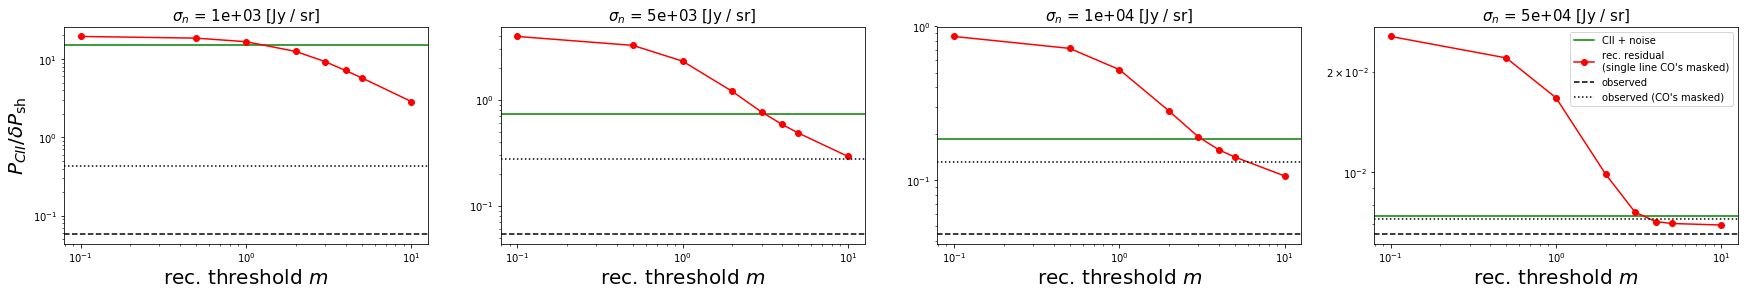

In [21]:
fig, ax = plt.subplots(1,4,figsize=(30,4))
sig_th_arr = [0.1,0.5,1,2,3,4,5,10]
for i,sigI in enumerate(sigI_arr):
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    varcii = np.var(Itrue_targ[0,:,:])
    varn = sigI**2
    varobs = np.var(Iobs_all)
    varobsmask = np.var(Iobs_all[mask1*mask2!=0])
    
    I1 = Itrue_targ[0,:,:] - np.mean(Itrue_targ[0,:,:])
    I2 = Iobs_all - np.mean(Iobs_all)
    robs = np.sum(I1*I2) / np.sqrt(np.sum(I1**2)*np.sum(I2**2))
    
    I1 = (Itrue_targ[0,:,:][mask1*mask2!=0] - np.mean(Itrue_targ[0,:,:][mask1*mask2!=0]))
    I2 = (Iobs_all[mask1*mask2!=0] - np.mean(Iobs_all[mask1*mask2!=0]))
    robsmask = np.sum(I1*I2) / np.sqrt(np.sum(I1**2)*np.sum(I2**2))
    
    varR_arr = np.zeros(len(sig_th_arr))
    rres_arr = np.zeros(len(sig_th_arr))
    for j,sig_th in enumerate(sig_th_arr):
        N_pred,iter_count,R_arr,f_arr = run_MP_sig(A, I_norm, Iobs_all, sigI,sig_th,
                                                   return_iter = True, return_Rf=True)
        Ipred_all, Ipred_targ = gen_Ipred(z_coords[sp2], N_pred[:,sp2], dth, 
                              nu_binedges, line_use, line_targ_vec, verbose = 0)
        R1_arr = R_arr + f_arr - Ipred_all
        varR_arr[j] = np.var(R_arr[mask1!=0])
        
        I1 = (Itrue_targ[0,:,:][mask1!=0] - np.mean(Itrue_targ[0,:,:][mask1!=0]))
        I2 = (R1_arr[mask1!=0] - np.mean(R1_arr[mask1!=0]))
        rres_arr[j] = np.sum(I1*I2) / np.sqrt(np.sum(I1**2)*np.sum(I2**2))

        
    ax[i].axhline(varcii/((varn+varcii)/np.sqrt(6000)), c='g', label = 'CII + noise')
    ax[i].plot(sig_th_arr,varcii/(varR_arr/np.sqrt(6000)),'ro-', 
               label = 'rec. residual \n(single line CO\'s masked)')
    ax[i].axhline(varcii/(varobs/np.sqrt(6000)), c= 'k', ls='--', label = 'observed')
    ax[i].axhline(varcii/(varobsmask/np.sqrt(6000)), c= 'k', ls=':', label = 'observed (CO\'s masked)')
    ax[i].set_xlabel(r'rec. threshold $m$', fontsize = 20)
    ax[i].set_title(r'$\sigma_n$ = ' + '%.0e [Jy / sr]'%sigI, fontsize = 15)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
ax[0].set_ylabel(r'$P_{CII}/\delta P_{\rm sh}$', fontsize = 20)
ax[i].legend(loc=0, fontsize = 10)
plt.savefig('plots/paperfig/res_mask.pdf', bbox_inches = 'tight', dpi = 200)

In [33]:
survey_param.cmv_config('cii')

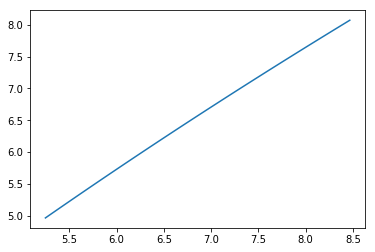

In [36]:
plt.plot(survey_param.z_bins,survey_param.xDcmv_vec**2*survey_param.zDcmv_vec)

In [125]:
print('z=%.2f'%survey_param.z_bins[21])
print('Vvox = %.3f Mpc'%(survey_param.xDcmv_vec[21]**2*survey_param.zDcmv_vec[21]/0.7**3))
print('I = %.3f Jy/sr'%np.mean(Itrue_targ[0,:,:],axis=0)[21])
print(cosmo_dist(6).luminosity_distance)

z=5.97
Vvox = 16.612 Mpc
I = 385.986 Jy/sr
39997.833764187475 Mpc / h


In [128]:
dnudOmdI=((1.5*u.GHz)*(0.43*u.arcmin**2)*(386*u.Jy/u.rad**2)).to(u.erg/u.s/u.Mpc**2)
rho = dnudOmdI*4*np.pi*(cosmo_dist(6).luminosity_distance*u.h/0.7)**2/(16.6*u.Mpc**3)
print(np.log10(rho.value))
print(10**40.1/rho.value)

39.69527898228155
2.5393409585351177


In [137]:
sign = np.sqrt(9.7e8/16.6)
sigcii = np.sqrt(6.1e8/16.6)
print(sign,sigcii)
np.std(Itrue_targ[0,:,:],axis=0)[21]

7644.196160470964 6061.9293918526655


497.7525672219331

In [139]:
np.std(Itrue_targ[0,:,:],axis=0)[21]

497.7525672219331

In [142]:
np.sqrt(6000)

77.45966692414834

In [185]:
print('masking fraction for single line CO is %.5f %%'\
      %((1 - np.sum(mask1) / np.prod(mask1.size))*100))
print('masking fraction for multiple line CO is %.5f %%'\
      %((1 - np.sum(mask2) / np.prod(mask2.size))*100))

masking fraction for single line CO is 0.95257 %
masking fraction for multiple line CO is 3.34343 %
